# ДОСЛІДЖЕННЯ ХВИЛЕВОДНИХ ТА РУПОРНИХ ВИПРОМІНЮВАЧІВ


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### Вихідні дані

In [79]:
lambd = 2.9e-02  # Довжина хвилі в метрах
a_r = 0.14   # Розмір рупора по осі a в метрах
b_r = 0.14   # Розмір рупора по осі b в метрах
theta = np.arange(0.01, np.pi / 2, 0.01)  # Кути theta для розрахунків

### Функції для обчислення векторно

In [80]:
def calculate_FH(theta, lambd, a_r):
    F1h = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.cos((np.pi * a_r * np.sin(theta)) / lambd) / 
             (1 - ((2 * a_r * np.sin(theta)) / lambd)**2))
    FH = F1h * FC
    return F1h, FC, FH

def calculate_FE(theta, lambd, b_r):
    F1e = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.sin((np.pi * b_r * np.sin(theta)) / lambd) / 
             ((np.pi * b_r * np.sin(theta)) / lambd))
    FE = F1e * FC
    return F1e, FC, FE

### Розрахунки для площин H та E

In [81]:
F1h, FC_H, FH = calculate_FH(theta, lambd, a_r)
F1e, FC_E, FE = calculate_FE(theta, lambd, b_r)

### Інтерполюємо для точного визначення ширини головної пелюстки

In [82]:
interp_FH = interp1d(FH, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_FE = interp1d(FE, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

### Ширина головної пелюстки

In [83]:
SGP1 = 2 * np.degrees(interp_FH(0.707))
SGP2 = 2 * np.degrees(interp_FE(0.707))

### Пошук максимумів і нульових кутів для площини H

In [84]:
steps = np.degrees(theta)
max_x_FH, max_y_FH = [], []
min_x_FH, min_y_FH = [], []

for i in range(1, len(FH) - 1):
    if FH[i] > FH[i - 1] and FH[i] > FH[i + 1]:
        max_x_FH.append(steps[i])
        max_y_FH.append(FH[i])

for i in range(1, len(FH) - 1):
    if FH[i] < FH[i - 1] and FH[i] < FH[i + 1]:
        min_x_FH.append(steps[i])
        min_y_FH.append(0)

print(f"Ширина головної пелюстки в площині H = {SGP1:.2f}\u00b0")
print(f"Значення нульових кутів в площині H: {', '.join(map(str, min_x_FH))} градусів")

Ширина головної пелюстки в площині H = 14.07°
Значення нульових кутів в площині H: 18.334649444186343, 30.939720937064457, 46.40958140559668, 68.75493541569878 градусів


### Пошук максимумів і нульових кутів для площини E

In [85]:
max_x_FE, max_y_FE = [], []
min_x_FE, min_y_FE = [], []

for i in range(1, len(FE) - 1):
    if FE[i] > FE[i - 1] and FE[i] > FE[i + 1]:
        max_x_FE.append(steps[i])
        max_y_FE.append(FE[i])

for i in range(1, len(FE) - 1):
    if FE[i] < FE[i - 1] and FE[i] < FE[i + 1]:
        min_x_FE.append(steps[i])
        min_y_FE.append(0)

print(f"Ширина головної пелюстки в площині E = {SGP2:.2f}\u00b0")
print(f"Значення нульових кутів в площині E: {', '.join(map(str, min_x_FE))} градусів")

Ширина головної пелюстки в площині E = 10.50°
Значення нульових кутів в площині E: 12.032113697747288, 24.6371851906254, 38.38817227376516, 56.14986392282068 градусів


### Візуалізація

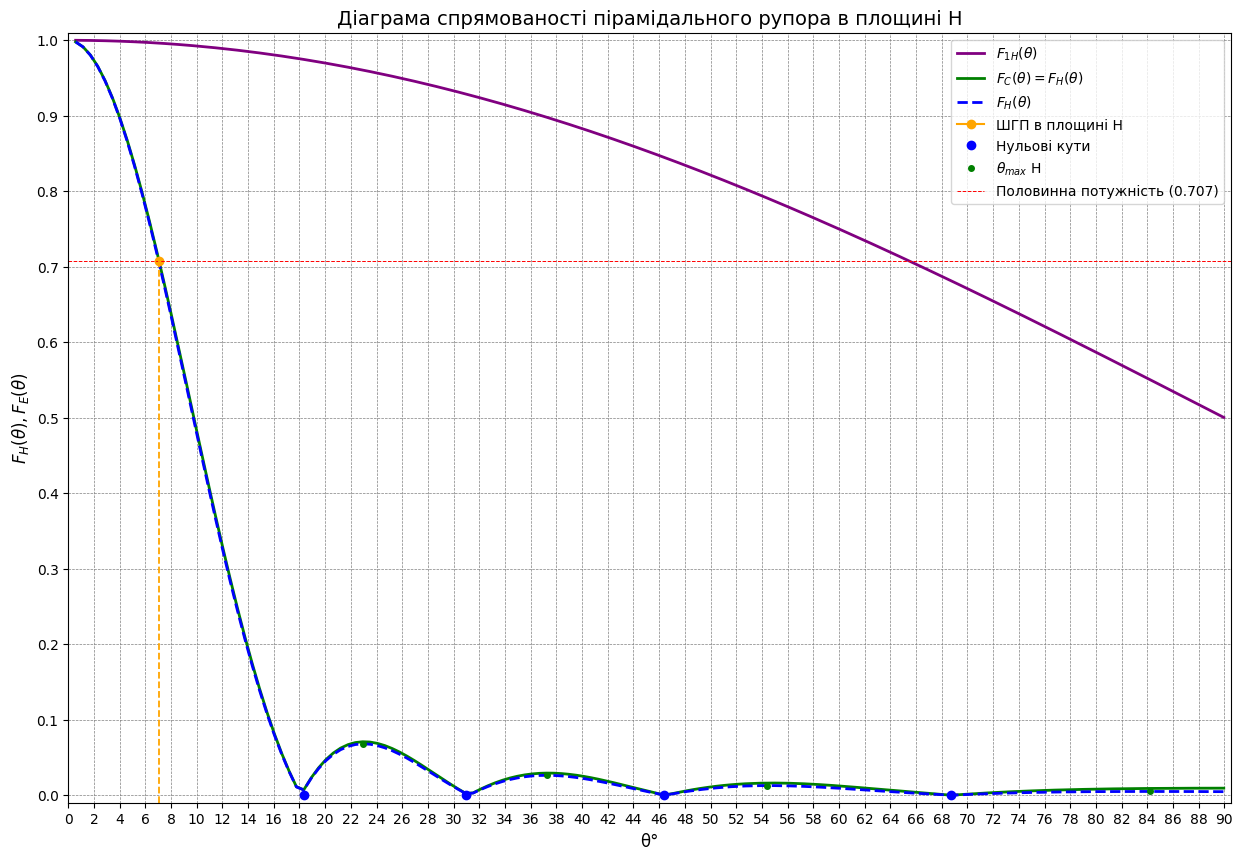

In [86]:
# Графік для площини H
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для H
plt.plot(steps, F1h, label="$ F_{1H}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(steps, FC_H, label="$ F_{C}(θ) = F_{H}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(steps, FH, label="$ F_{H}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', markersize=6, label="ШГП в площині H")

# Позначаємо нульові кути
plt.plot(min_x_FH, min_y_FH, 'bo', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FH, max_y_FH, "o", color="green", markersize=4, label="$ \\theta_{max} $ H")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP1 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині H", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()


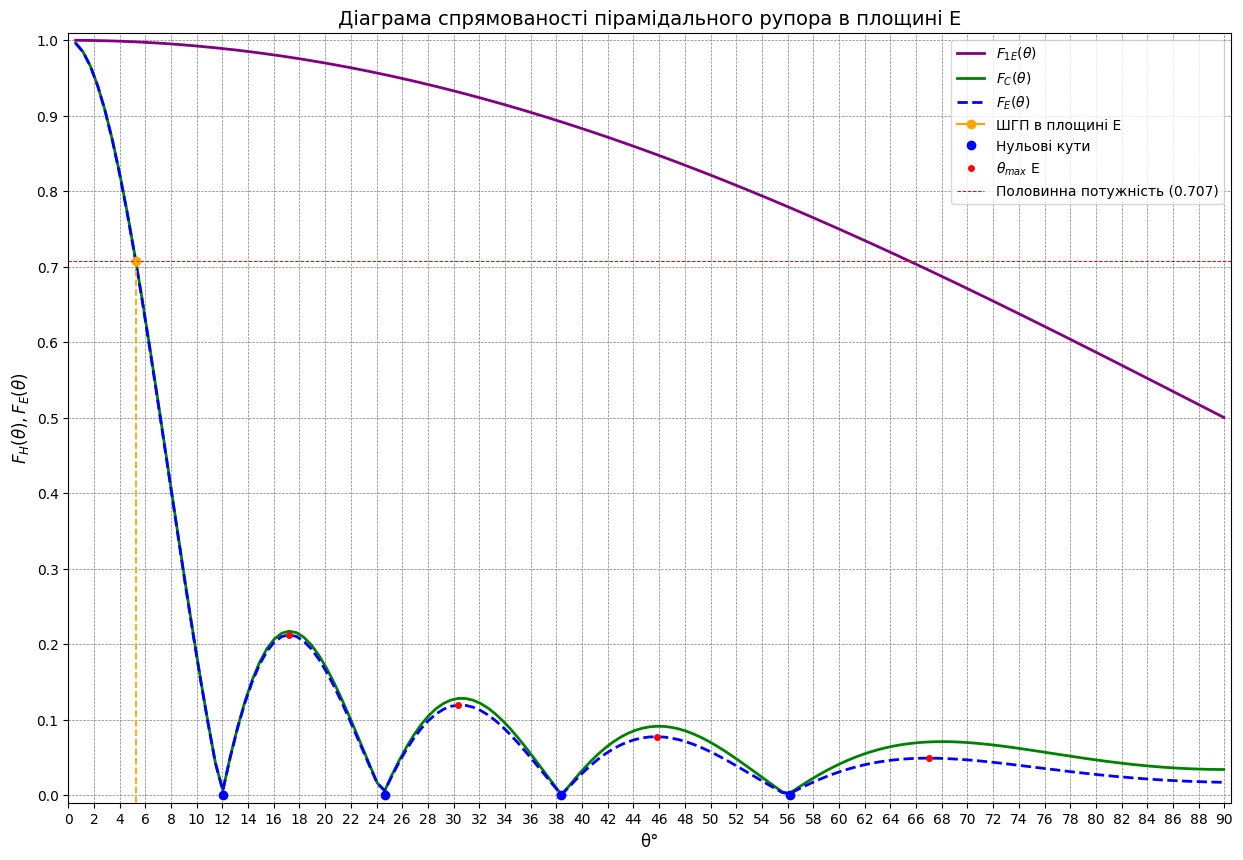

In [87]:
# Графік для площини E
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для E
plt.plot(steps, F1e, label="$ F_{1E}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(steps, FC_E, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(steps, FE, label="$ F_{E}(θ) $", linestyle="dashed", color="blue", linewidth=2)

# Позначаємо знайдені інтерпольовані точки для ШГП
plt.plot(SGP2 / 2, 0.707, marker="o", color='orange', markersize=6, label="ШГП в площині E")

# Позначаємо нульові кути
plt.plot(min_x_FE, min_y_FE, 'bo', label="Нульові кути")

# Позначаємо максимуми
plt.plot(max_x_FE, max_y_FE, "ro", markersize=4, label="$ \\theta_{max} $ E")

# Додаємо вертикальні та горизонтальні лінії для ШГП
plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP2 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині E", fontsize=14)

# Налаштування візуалізації осей
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)

plt.show()